<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [8]:
# Subset the data to include only November (Nov) and December (Dec) shopping sessions
filtered_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Group the data by customer type and calculate total sessions and purchases
customer_stats = filtered_data.groupby('CustomerType').agg(
    Total_Sessions=('SessionID', 'count'),
    Total_Purchases=('Purchase', 'sum')
)

# Calculate purchase rates by customer type
customer_stats['Purchase_Rate'] = customer_stats['Total_Purchases'] / customer_stats['Total_Sessions']
customer_stats


,Total_Sessions,Total_Purchases,Purchase_Rate
CustomerType,,,
New_Customer,728,199.0,0.273352
Returning_Customer,3722,728.0,0.195594


In [9]:
# Store the calculated purchase rates in the desired dictionary format
purchase_rates = {
    "Returning_Customer": round(customer_stats.loc['Returning_Customer', 'Purchase_Rate'], 3),
    "New_Customer": round(customer_stats.loc['New_Customer', 'Purchase_Rate'], 3)
}

purchase_rates


{'Returning_Customer': 0.196, 'New_Customer': 0.273}

In [10]:


# Filter data for returning customers in November and December and select relevant duration variables
returning_customers_data = filtered_data[filtered_data['CustomerType'] == 'Returning_Customer']
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Compute the correlation matrix for the duration variables
correlation_matrix = returning_customers_data[duration_columns].corr()

# Remove self-correlations and find the strongest correlation between different variables
correlation_matrix_no_self = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
strongest_non_self_pair = correlation_matrix_no_self.abs().unstack().sort_values(ascending=False).drop_duplicates().idxmax()

# Updated result in the desired dictionary format
top_correlation = {
    "pair": strongest_non_self_pair,
    "correlation": round(correlation_matrix_no_self.unstack()[strongest_non_self_pair], 3)
}
top_correlation



{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': 0.417}

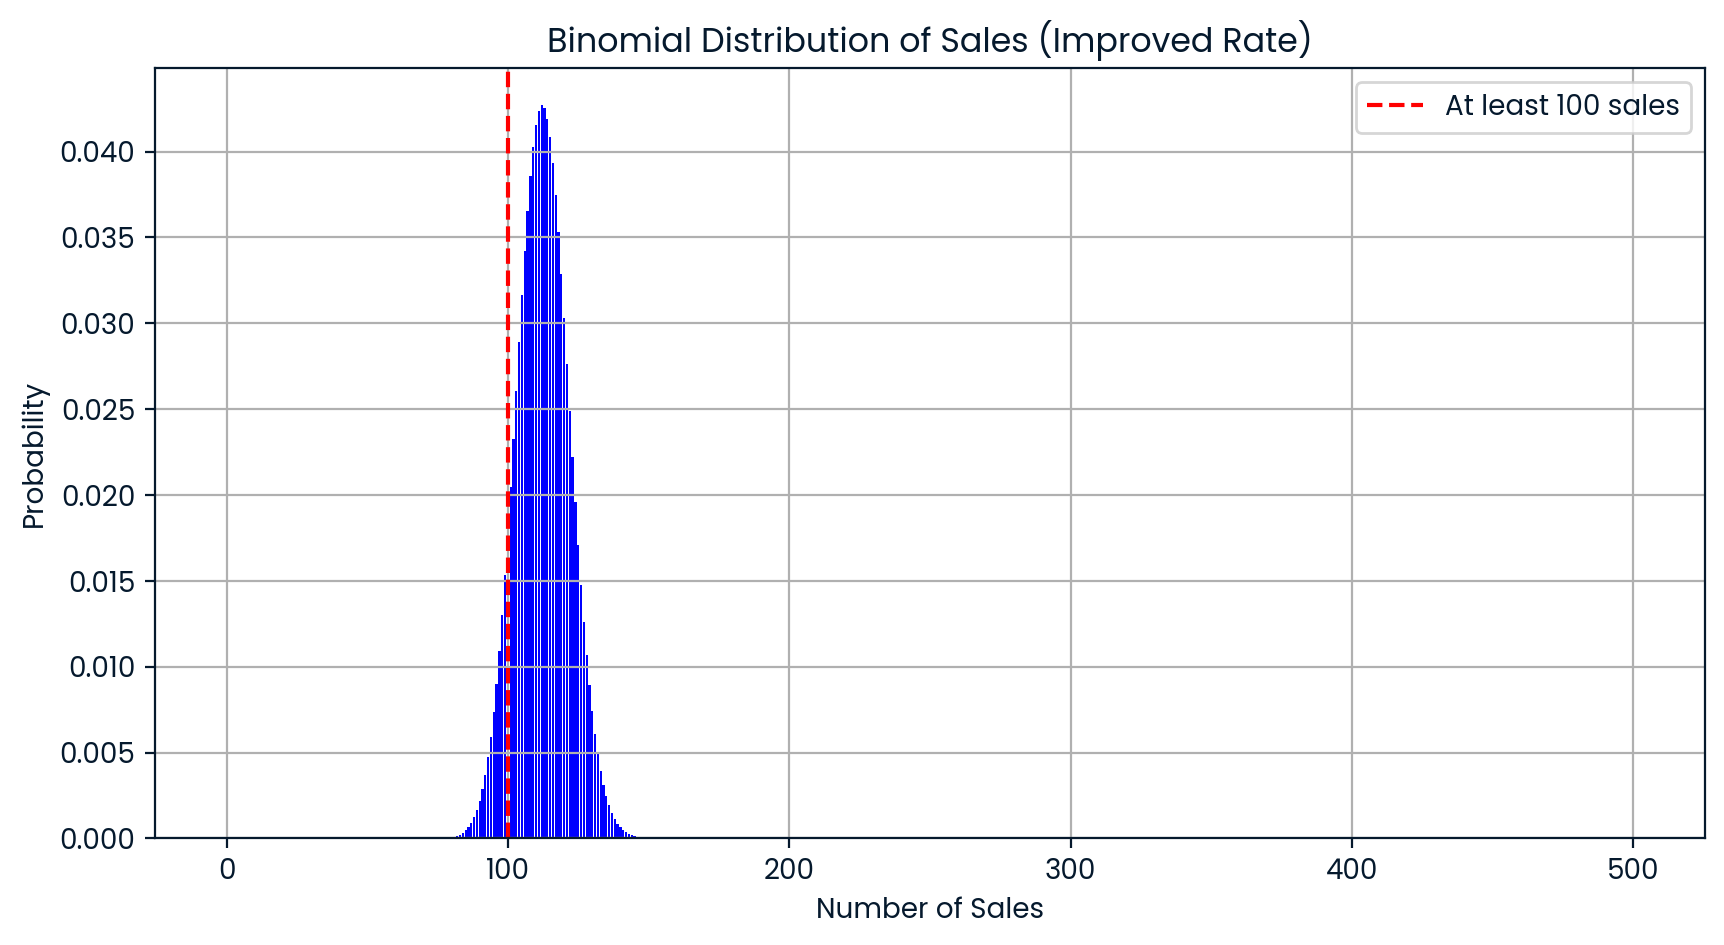

0.9190464150313483

In [11]:
from scipy.stats import binom

# Improved purchase rate for returning customers (15% increase)
current_rate = customer_stats.loc['Returning_Customer', 'Purchase_Rate']
improved_rate = current_rate + 0.15 * current_rate

# Number of trials and the number of successes needed
n_sessions = 500
n_sales_needed = 100

# Calculate the probability of achieving at least 100 sales
prob_at_least_100_sales = 1 - binom.cdf(n_sales_needed - 1, n_sessions, improved_rate)

# Plotting the binomial distribution if requested
import matplotlib.pyplot as plt

x = range(0, n_sessions+1)
y = binom.pmf(x, n_sessions, improved_rate)
plt.figure(figsize=(10, 5))
plt.bar(x, y, color='blue')
plt.title('Binomial Distribution of Sales (Improved Rate)')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.axvline(x=n_sales_needed, color='red', linestyle='--', label=f'At least {n_sales_needed} sales')
plt.legend()
plt.grid(True)
plt.show()

prob_at_least_100_sales
